In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [25]:
df=pd.read_csv("more_corr_data_45_pca.csv")
df

,is_baseline_formation,swelling_severity,PC1,PC2,PC3,PC4,cycles_to_50_pct,cycles_to_60_pct,cycles_to_70_pct,cycles_to_80_pct
0,0,3,27.905064,-0.139614,-11.341511,-4.460382,496,478,461,385
1,0,1,-87.501359,-7.570479,-1.452987,-8.064549,530,657,527,451
2,0,0,51.525030,3.285209,-3.250244,0.489360,573,611,665,429
3,1,0,-98.875979,-3.003603,-5.538850,-8.465275,419,408,362,336
4,0,3,168.946412,-4.758355,-12.704126,-6.932284,551,535,559,449
...,...,...,...,...,...,...,...,...,...,...
74,1,0,-98.874231,-3.283033,1.060883,-8.183976,412,402,362,340
75,0,3,41.618613,16.061807,-12.905554,10.628652,547,630,609,461
76,1,1,-98.429229,42.629031,-18.502072,-8.960331,615,595,594,379
77,0,3,-65.131478,4.475922,-13.193879,9.072445,507,561,649,421


In [26]:
X=df.drop(columns=['cycles_to_50_pct', 'cycles_to_60_pct', 'cycles_to_70_pct', 'cycles_to_80_pct']).values
y=df['cycles_to_50_pct'].values

In [27]:
import numpy as np

def calculate_mpe(y_true, y_pred):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    n = len(y_true)
    if n == 0:
        return 0  # Avoid division by zero if there are no data points
    mpe = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
    return mpe


In [34]:
def ridge_regression(X, y, alpha=1.0, test_size=0.4):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size
    )

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mpe = calculate_mpe(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {
        "model": ridge_model,
        "predictions": y_pred,
        "mse": mse,
        "mape": mape,
        "r2": r2,
        "mpe": mpe,
    }

    return results

In [35]:
results = ridge_regression(X, y, alpha=500, test_size=0.1)

print("R2 Score (Pandas dataframe):",results['r2'])
print("Ridge Regression Results:")
print("Mean Squared Error:", results["mse"])
print("Mean Absolute Percentage Error:", results["mape"])
print("Mean Percentage Error:", results["mpe"])
print("Coefficients:", results["model"].coef_)
print("Intercept:", results["model"].intercept_)


R2 Score (Pandas dataframe): 0.308100647705533
Ridge Regression Results:
Mean Squared Error: 3662.87192733739
Mean Absolute Percentage Error: 0.09116749941600769
Mean Percentage Error: 9.11674994160077
Coefficients: [-1.17353225  1.67023925  0.37516285  0.22464881 -1.88954252 -0.62016455]
Intercept: 500.949142561455


array([600.45600985, 527.49643406, 463.27467925, 551.35485121,
       506.47374646, 481.32081907, 469.25919183, 478.55660802])

In [60]:
def lasso_regression(X, y, alpha=1.0, test_size=0.4):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size
    )

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mpe = calculate_mpe(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {
        "model": lasso_model,
        "predictions": y_pred,
        "mse": mse,
        "mape": mape,
        "mpe": mpe,
        "r2": r2,
    }

    return results


In [94]:
results = lasso_regression(X, y, alpha=1000, test_size=0.1)

print("Lasso Regression Results:")
print("R2 Score (Pandas dataframe):",results['r2'])
print("Mean Squared Error:", results["mse"])
print("Mean Absolute Percentage Error:", results["mape"])
print("Mean Percentage Error:", results["mpe"])
print("Coefficients:", results["model"].coef_)
print("Intercept:", results["model"].intercept_)


Lasso Regression Results:
R2 Score (Pandas dataframe): 0.7298725360662504
Mean Squared Error: 1219.8280952588298
Mean Absolute Percentage Error: 0.049592275133995195
Mean Percentage Error: 4.95922751339952
Coefficients: [-0.         0.         0.3612918 -0.        -0.         0.       ]
Intercept: 510.3879280658962


In [95]:
def elastic_regression(X, y, alpha=1.0, l1_ratio=0.5, test_size=0.4):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size
    )

    elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_model.fit(X_train, y_train)

    y_pred = elastic_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mpe = calculate_mpe(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {
        "model": elastic_model,
        "predictions": y_pred,
        "mse": mse,
        "mape": mape,
        "mpe": mpe,
        "r2": r2,
    }

    return results


In [103]:
results = elastic_regression(X, y, alpha=2000, l1_ratio=0.1, test_size=0.1)

print("Elastic Regression Results:")
print("R2 Score (Pandas dataframe):",results['r2'])
print("Mean Squared Error:", results["mse"])
print("Mean Absolute Percentage Error:", results["mape"])
print("Mean Percentage Error:", results["mpe"])
print("Coefficients:", results["model"].coef_)
print("Intercept:", results["model"].intercept_)


Elastic Regression Results:
R2 Score (Pandas dataframe): 0.7191709668790651
Mean Squared Error: 1453.6412826922394
Mean Absolute Percentage Error: 0.04876104650150239
Mean Percentage Error: 4.876104650150239
Coefficients: [-0.          0.          0.35564836  0.         -0.01619837  0.        ]
Intercept: 511.343792233467


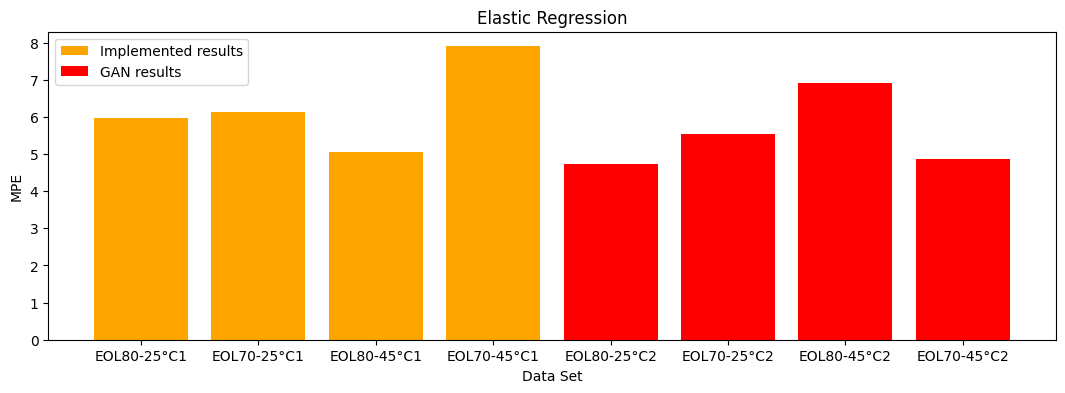

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Sample data
categories = ['EOL80-25°C1', 'EOL70-25°C1', 'EOL80-45°C1', 'EOL70-45°C1',
              'EOL80-25°C2', 'EOL70-25°C2', 'EOL80-45°C2', 'EOL70-45°C2',]
values = [5.96, 6.14, 5.06, 7.90,
          4.72, 5.53, 6.92, 4.87]

# Choose bar colors - highlight 'B' and 'D' with a different color
colors = ['orange', 'orange', 'orange', 'orange',
          'red', 'red', 'red', 'red']

plt.figure(figsize=(13, 4))
# Create bar plot
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Data Set')
plt.ylabel('MPE')
plt.title('Elastic Regression')

legend_elements = [
    Patch(facecolor='orange', label='Implemented results'),
    Patch(facecolor='red', label='GAN results')
]
plt.legend(handles=legend_elements)

# Show the plot
plt.show()


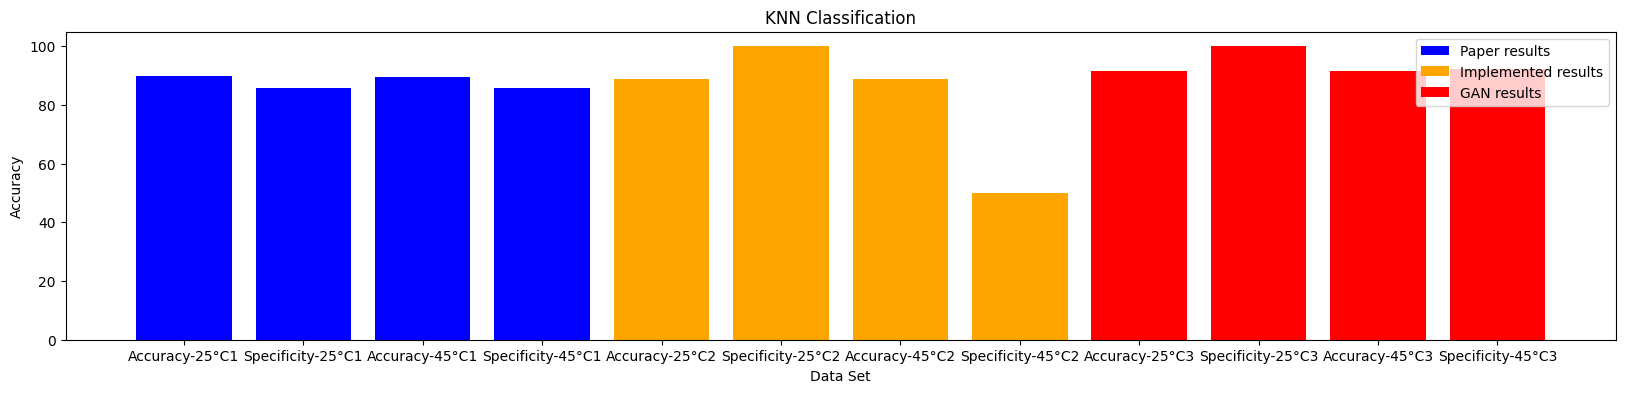

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Sample data
categories = ['Accuracy-25°C1', 'Specificity-25°C1', 'Accuracy-45°C1', 'Specificity-45°C1',
              'Accuracy-25°C2', 'Specificity-25°C2', 'Accuracy-45°C2', 'Specificity-45°C2',
              'Accuracy-25°C3', 'Specificity-25°C3', 'Accuracy-45°C3', 'Specificity-45°C3',]
values = [89.74, 85.79, 89.47, 85.89,
          88.87, 100, 88.87, 50,
          91.67, 100, 91.67, 92.3]

# Choose bar colors - highlight 'B' and 'D' with a different color
colors = ['blue', 'blue', 'blue', 'blue',
          'orange', 'orange', 'orange', 'orange',
          'red', 'red', 'red', 'red']

plt.figure(figsize=(20, 4))
# Create bar plot
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Data Set')
plt.ylabel('Accuracy')
plt.title('KNN Classification')

legend_elements = [
    Patch(facecolor='blue', label='Paper results'),
    Patch(facecolor='orange', label='Implemented results'),
    Patch(facecolor='red', label='GAN results')
]
plt.legend(handles=legend_elements)

# Show the plot
plt.show()
